In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
!nvidia-smi

Sun Jul 11 08:06:59 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    30W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Importing Datasets & Few other required Libraries!

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [9]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [14]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### We have 60000 samples of images, each image if size (28, 28), then we have output labels as 0 to 9, that is 10 different classes are there.


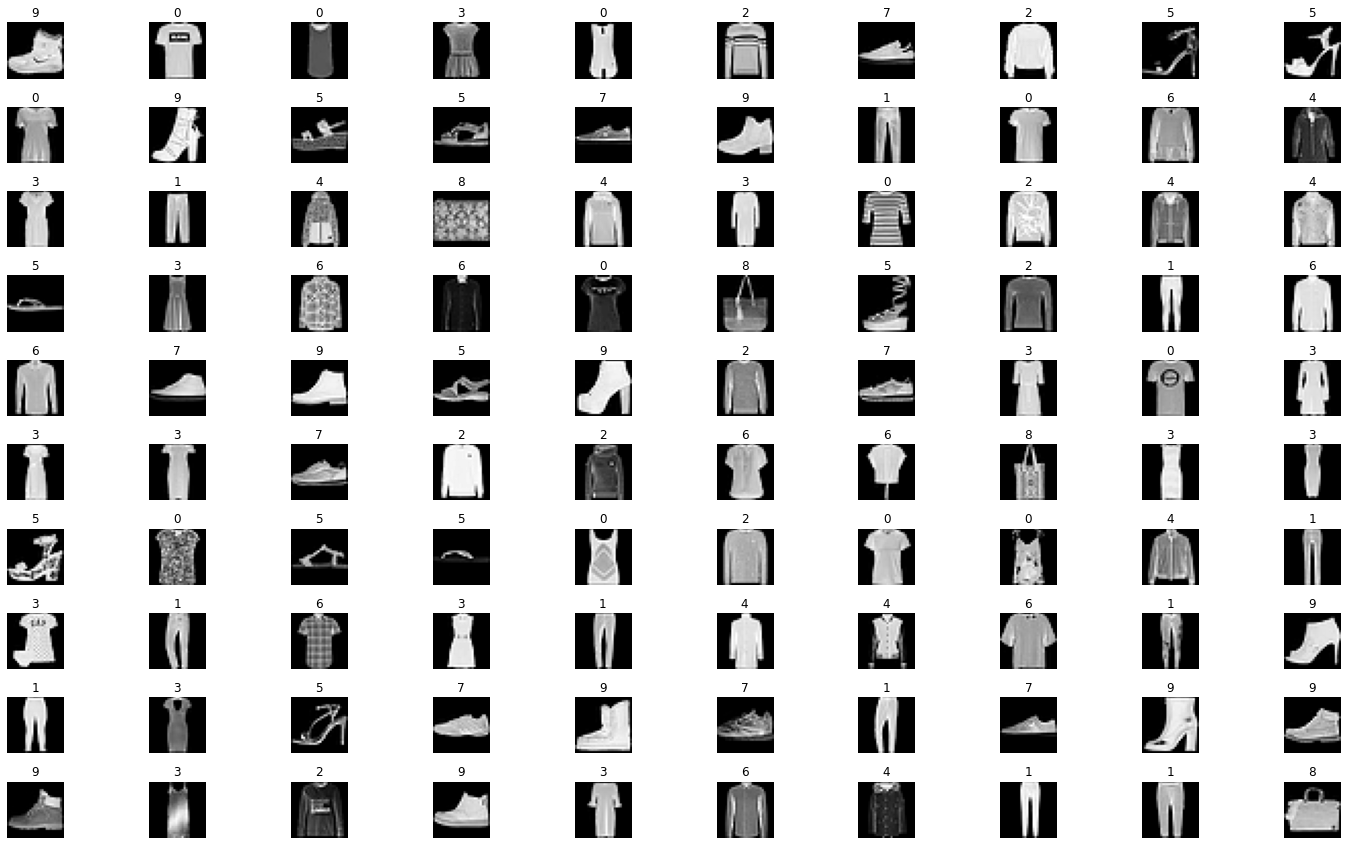

In [53]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(10, 10, figsize = (25, 15))
ax = ax.ravel()

for i in np.arange(100):
  ax[i].imshow(x_train[i], cmap = "gray")      # Setting the Image
  ax[i].set_title(y_train[i])   # Setting the Title/Category of the Image
  ax[i].axis(False)

plt.subplots_adjust(hspace = 0.5)
plt.show()

## Creating a CNN

In [21]:
from tensorflow import keras
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from keras.models import Sequential

In [31]:
# np.expand_dims(x_train, 3).shape
len(np.unique(y_train))

10

In [49]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [50]:
# Creating a CNN Architecture
CNN_Model = Sequential([
                        
                        # 1st Block
                        Conv2D(filters = 32,
                               kernel_size = (5, 5),
                               activation = "relu",
                               input_shape = (28, 28, 1)
                               ),
                        Conv2D(filters = 32,
                               kernel_size = (5, 5),
                               activation = "relu",
                              #  input_shape = (28, 28)
                               ),
                        MaxPool2D(),


                      # 2nd Block
                        Conv2D(filters = 64,
                               kernel_size = (5, 5),
                               activation = "relu",
                              #  input_shape = (28, 28)
                               ),
                        Conv2D(filters = 64,
                               kernel_size = (5, 5),
                               activation = "relu",
                              #  input_shape = (28, 28)
                               ),
                        MaxPool2D(),

                     # Flattening the Input Images   
                        Flatten(),

                     # Removing the dependency from some neurons   
                        Dropout(0.2),


                     # Final Output Layer   
                        Dense(units = len(np.unique(y_train)),
                              activation = "softmax",
                              )
],
name = "My_CNN_Model"
)

CNN_Model.summary()

Model: "My_CNN_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 6, 6, 64)          51264     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 2, 2, 64)          102464    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 64)               

In [51]:
# Compiling the Model
CNN_Model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]

)

In [52]:
# Fit The Model
CNN_Model_history = CNN_Model.fit(
                                    np.expand_dims(x_train, -1), y_train, epochs = 10
)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7477 - accuracy: 0.7305
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3460 - accuracy: 0.8760
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2964 - accuracy: 0.8909
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2631 - accuracy: 0.9044
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2346 - accuracy: 0.9155
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2118 - accuracy: 0.9221
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1982 - accuracy: 0.9269
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1827 - accuracy: 0.9341
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1669 - accuracy: 0.9391
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.157

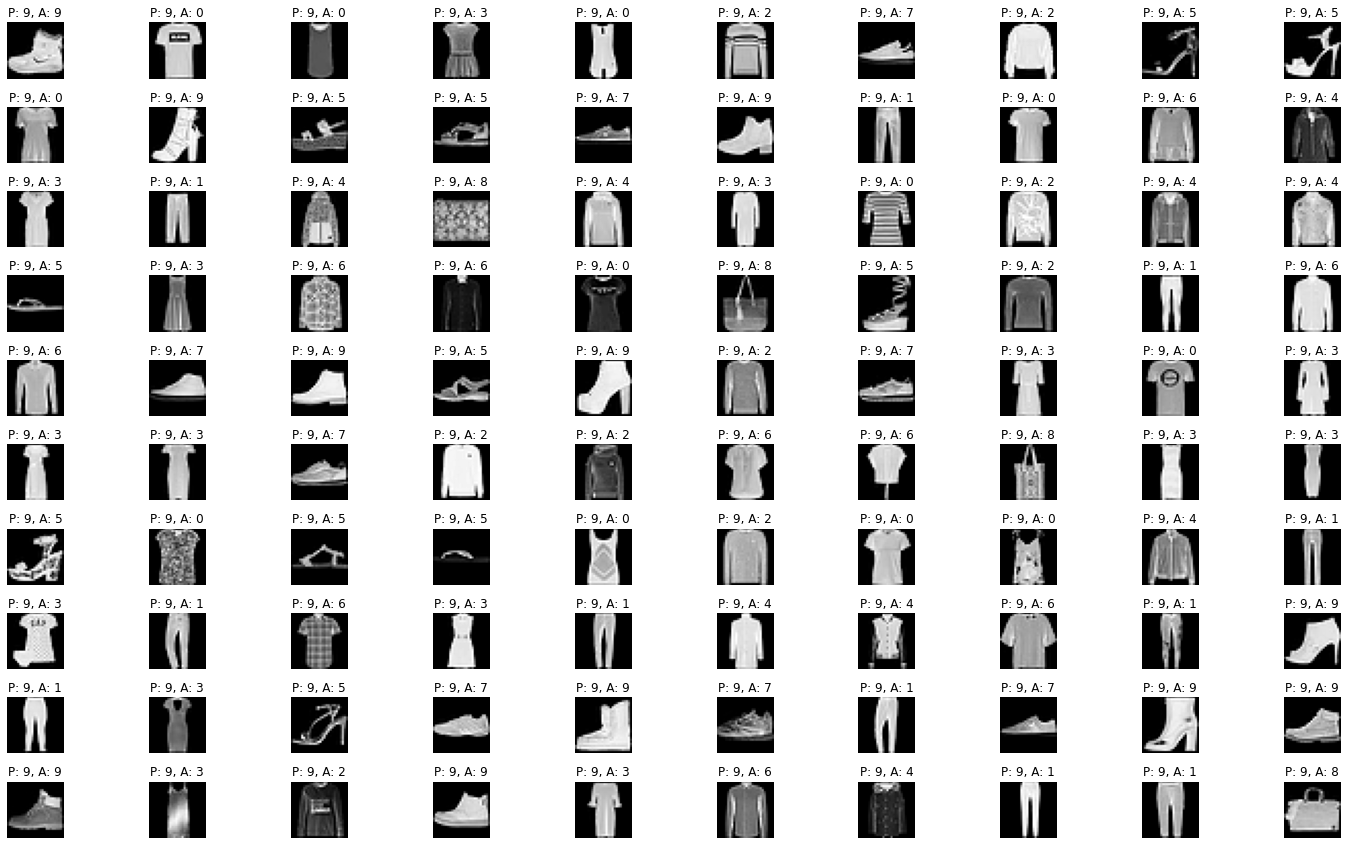

In [70]:
fig, ax = plt.subplots(10, 10, figsize = (25, 15))
ax = ax.ravel()

for i in np.arange(100):
  ax[i].imshow(x_train[i], cmap = "gray")      # Setting the Image
  ax[i].set_title("P: {}, A: {}".format(np.argmax(CNN_Model.predict(x_train[0].reshape(1, 28, 28, 1))), y_train[i]))   # Setting the Title/Category of the Image
  ax[i].axis(False)

plt.subplots_adjust(hspace = 0.5)
plt.show()

In [64]:
x_train[0].shape, x_train[0].reshape(1, 28, 28, 1).shape

((28, 28), (1, 28, 28, 1))

In [67]:
CNN_Model.predict(x_train[0].reshape(1, 28, 28, 1))

array([[1.9589699e-08, 1.6969538e-13, 5.1900373e-10, 5.5271538e-08,
        5.9667080e-09, 1.1496591e-06, 7.7663842e-08, 4.6320334e-03,
        1.0081968e-12, 9.9536669e-01]], dtype=float32)

In [68]:
CNN_Model.predict_classes(x_train[0].reshape(1, 28, 28, 1))[0]

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


9

In [69]:
np.argmax(CNN_Model.predict(x_train[0].reshape(1, 28, 28, 1)))

9

In [71]:
CNN_Model.evaluate(np.expand_dims(x_test, -1), y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2847 - accuracy: 0.9069


[0.2846974730491638, 0.9068999886512756]

In [74]:
for i in CNN_Model.layers:
  print(i.name)

conv2d_24
conv2d_25
max_pooling2d_12
conv2d_26
conv2d_27
max_pooling2d_13
flatten_6
dropout_6
dense_6


## Transfer Learning Models

In [100]:
import tensorflow_hub as h

KL = h.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_101/feature_vector/5", trainable = False, input_shape =  (28, 28, 3))

TL_Model = keras.Sequential([
                       KL,
                       Dense(units = 10, activation = "softmax")
])

# TL_Model.compile(loss = "sparse_categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])

In [101]:
TL_Model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_14 (KerasLayer)  (None, 2048)              42626560  
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 10)                20490     
Total params: 42,647,050
Trainable params: 20,490
Non-trainable params: 42,626,560
_________________________________________________________________


In [ ]:
keras.Sequential()

keras.models.Sequential()

(2048 * 10). <- no. of weights + biases for each neuron (10) = 20480 + 10 = 20490